A decision tree is a supervised machine learning algorithm that can be used for both classification and regression tasks. It works by creating a tree like model of decisions and their possible consequences. Each node in the tree represents a decision rule, and each leaf node represents an outcome or prediction.

Here's an example of how to create a decision tree classifier in python:

Model Accuracy: 100.00%


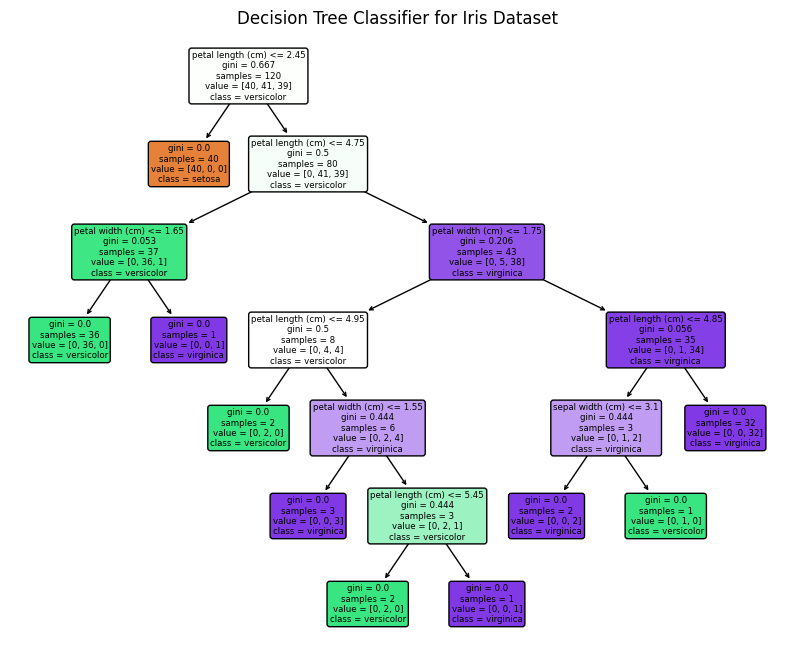

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data   # Features: Sepal length, Sepal width, Petal length, Petal width
y = iris.target  # Target: Class labels (Setosa, Versicolour, Virginica)

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)  # Create classifier
clf.fit(X_train, y_train)  # Train the model on the training data

# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 5: Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualizing the Decision Tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Classifier for Iris Dataset")
plt.show()


To use the decision tree for prediction, we can use the predict method:

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data   # Features
y = iris.target  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Use the predict() method to make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Predict for a single new data point
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Sepal length, Sepal width, Petal length, Petal width
prediction = clf.predict(new_data)
print(f"Predicted class for new data: {iris.target_names[prediction][0]}")


Model Accuracy: 96.67%
Predicted class for new data: setosa


Decision Tree Regression: Train a model using DecisionTreeRegressor and use predict() to make predictions.

Steps-
a) Load the dataset,
b) Split the data into training and testing sets,
c) Train a Decision Tree Regressor,
d) Make predictions and evaluate using Mean Squared Error (MSE),
e) Visualize the actual vs predicted values.

Code for Regression:

Mean Squared Error: 0.018453611512645865


<ipython-input-1-4d06b3bbe346>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]  # Grid for smooth curve


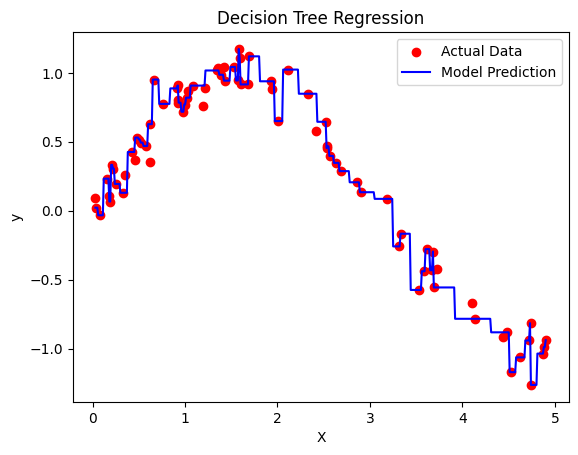

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create sample data (e.g., a simple sine wave function)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1  # Adding some noise

#  Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

#  Make predictions
y_pred = regressor.predict(X_test)

#  Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the results
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]  # Grid for smooth curve
y_grid_pred = regressor.predict(X_grid)

plt.scatter(X, y, color='red', label="Actual Data")
plt.plot(X_grid, y_grid_pred, color='blue', label="Model Prediction")
plt.title("Decision Tree Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()



Pruning Decision Tree: Pruning in decision trees is a technique used to reduce the complexity of the model and prevent overfitting.

Implementation of Post-Pruning

Steps-
a) Load Dataset,
b) Divide the dataset into training and testing subsets,
c) Compute the Cost Complexity Path,
d) Train Trees for Each Alpha Value,
e) Pruning the Tree based on different alpha values,
f) Evaluating and Selecting the Best Pruned Tree.

Best Post-Pruned Decision Tree Accuracy: 98.33%


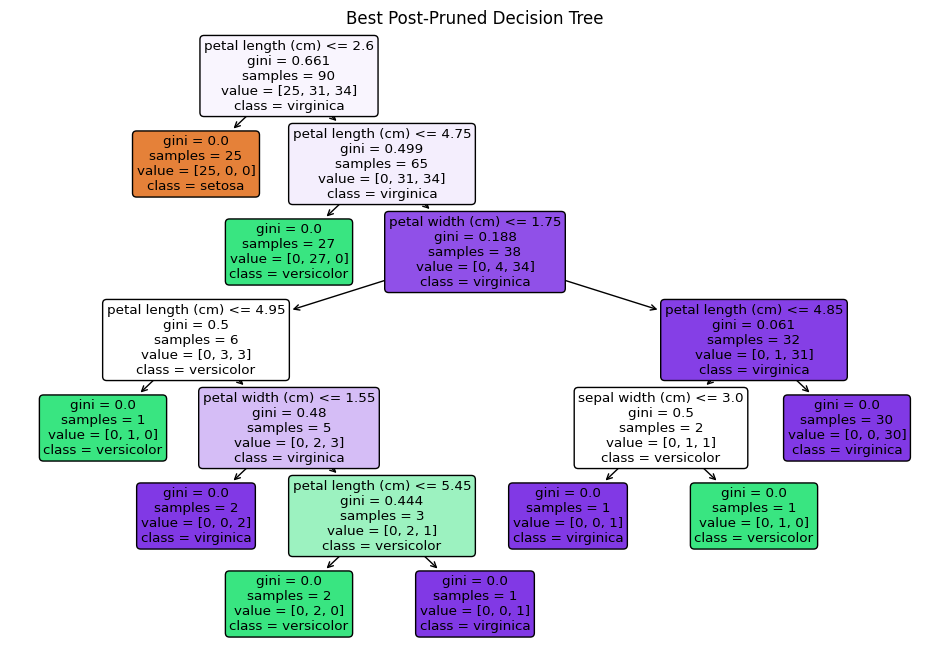

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 3: Grow the full decision tree
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

# Step 4: Compute the cost complexity pruning path
path = clf_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Step 5: Train trees for each alpha value and evaluate
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=32)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate each tree and find the best one
best_clf = None
best_accuracy = 0

for clf in clfs:
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_clf = clf

print(f"Best Post-Pruned Decision Tree Accuracy: {best_accuracy * 100:.2f}%")

# Step 6: Visualize the best pruned tree
plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Best Post-Pruned Decision Tree")
plt.show()


Questions

1. How can we extract and interpret decision rules from a decision tree model to understand its decision-making process and simplify the model, and how can this be implemented in Python?

2. How can a ternary split with two thresholds and three branches be used instead of a binary split for numeric inputs in decision tree modeling, and what are the benefits and challenges of this approach?

3. How can we build a regression tree to model a dataset and visualize the decision boundaries (regression regions) for predicting continuous values?

4. How can discontinuities at leaf boundaries in regression trees be reduced, and how can this approach be implemented in Python?

5. Explain both prepruning and postpruning techniques for decision trees, including their implementation using Python?